# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

Le travail a été fait par le qudrinome **M1 SII**:


*   DJEGHALI Ikram
*   MOUSSI Samy
*   AIT OUBELLI Syphax
*   MERROUCHE Amira


# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

Etant donné que nous tenons compte de l'ordre et qu'il n ya pas de de repetition, il est normal de penser aux arrangements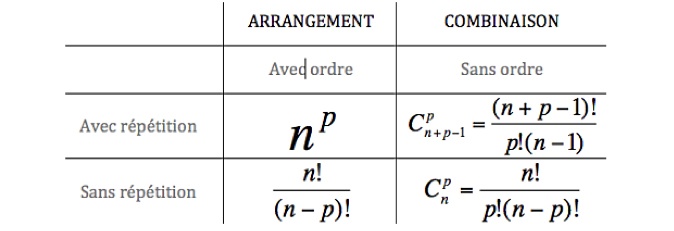

on aura donc 6! / (6-2)! = 6!/4! = 720/24 = 30 - p

donc 30 - 2 = 28 features

In [ ]:
def mapping(X):
    
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j));
            k=k+1
    return outX    


In [ ]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));
 

In [ ]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCostReg(X2, y, theta, lambdaa):
    m, n = X2.shape

    predictions = Sigmoid(np.matmul(X2, theta))
    J =  (sum((y)*np.log(predictions) + (1-y)*np.log(1-predictions))) / (-m)
    reg_term = (lambdaa / (2 * m)) * np.sum(np.square(theta[1:n]))
    J = J + reg_term
    return J

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X2, y, theta, alpha, iterations, lambdaa):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
  costs = np.zeros(iterations)
  theta0 = np.zeros(iterations)
  theta1 = np.zeros(iterations)
  i = 0 
  m= len(X)
  n = len(theta)

  while((i<iterations) ):
    
    
    predictions = Sigmoid(np.matmul(X2, theta))
    #print(f"\n Iteration {i} : cost = {computeCostReg(X2, y, theta, lambdaa)}")
    theta0[i] = theta[0]
    theta1[i] = theta[1]
    diff = np.subtract(predictions, y)
    #ridge_reg_term = (lambdaa / 2 * m) * np.sum(np.square(theta))
    cost = computeCostReg(X2,y,theta,lambdaa)
    costs[i] = cost
    gradient = (1 / m) * (X2.T.dot(diff) + (lambdaa * theta))

    theta = theta - (alpha * gradient)
    i+=1

  return  (theta, costs, theta0, theta1)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X2.shape[1]
theta = np.zeros((n, 1))
theta.shape

(28, 1)

Calculer le cout initial

In [ ]:
lambdaa = 1;
initialCost=computeCostReg(X2, y, theta, lambdaa)
print(initialCost)

[0.69314718]


Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
theta = np.zeros((n, 1))

iterations = 1500;
alpha = 0.01;

# paramètre de regression
lambdaa = 1;


# Appel
theta, costs, theta0, theta1 = gradientDescent(X2, y, theta, alpha, iterations, lambdaa);

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawCircle():
  plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
  plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

  xx = np.linspace(-1,1.5,50)
  yy= np.linspace(-1,1.5,50)
  z=np.zeros((len(xx),len(yy)))
  for i in range(len(xx)):
      for j in range(len(yy)):
          z[i,j] =mapFeaturePlot(xx[i],yy[j],6) @ theta
  plt.contour(xx,yy,z.T,0)
  plt.xlabel('x 1')
  plt.ylabel('x 2')
  plt.legend(loc=0)
    

In [ ]:
def mapFeaturePlot(x1,x2,degree):

    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out


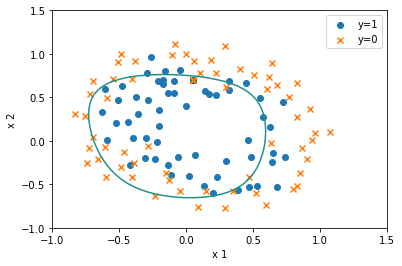

In [ ]:
drawCircle()

Nous remarquons que notre cercle, meme si separe une grande partie des données mais un nombre assez important de ces dernieres est mal classé

Nous allons verifier cela dans ce qui suit

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [ ]:
def predict(X2, theta, threshold=0.5):

    y_pred =Sigmoid(np.matmul(X2, theta))
    y_pred [y_pred >= threshold] = 1
    y_pred [y_pred < threshold]  = 0

    return y_pred


# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'x 2')

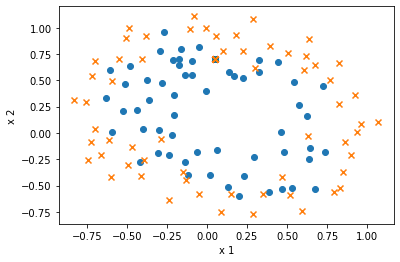

In [ ]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

plt.xlabel('x 1')
plt.ylabel('x 2')

Traçage du coût en fonction de theta0 et theta1

In [ ]:
def plot_costs_theta(costs, thetha0, theta1):

  fig = plt.figure()
  ax = fig.gca(projection='3d')
  z = costs
  x = theta0
  y = theta1
  ax.plot(x, y, z, label='J (theta)')
  ax.legend()

plt.show()

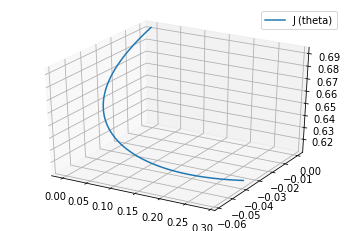

In [ ]:
plot_costs_theta(costs, theta0, theta1)

In [ ]:
def plot_cost_iterations(theta0, theta1, costs):
  fig, ax1 = plt.subplots()


  ax1.set_xlabel('Iterations')
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()
  ax2.plot(costs, label='J(theta)')

  fig.legend();

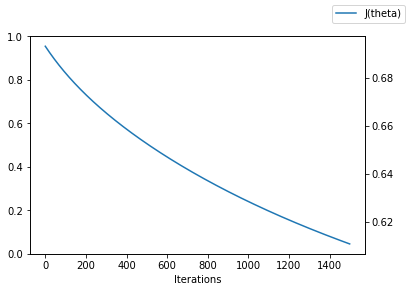

In [ ]:
plot_cost_iterations(theta0, theta1, costs)

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [ ]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
def precision(X2, y, theta):
  y_pred=predict(X2, theta)
  precision = np.mean(y==y_pred)*100
  return precision
precision(X2, y, theta)

73.72881355932203

Une precision de 73% montre que notre modele est assez bon, mais qui peut etre amelioré

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(penalty='l2')
model.fit(X2,y)
model.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-9.40316896e-05,  6.25200403e-01,  1.18110372e+00,
        -2.01998737e+00, -9.17422545e-01, -1.43161951e+00,
         1.24007673e-01, -3.65545995e-01, -3.57235803e-01,
        -1.75177398e-01, -1.45813451e+00, -5.09079430e-02,
        -6.15531333e-01, -2.74684592e-01, -1.19285084e+00,
        -2.42159297e-01, -2.06009268e-01, -4.46834189e-02,
        -2.77786348e-01, -2.95378201e-01, -4.56358841e-01,
        -1.04313960e+00,  2.78215032e-02, -2.92419721e-01,
         1.56135368e-02, -3.27375607e-01, -1.43860298e-01,
        -9.24641743e-01]])

In [ ]:
theta.reshape(7,4)

array([[ 0.28783225, -0.03416415,  0.21532349, -0.50491072],
       [-0.14297456, -0.28684655, -0.1009785 , -0.06781747],
       [-0.07817218, -0.1304173 , -0.40509245, -0.01898685],
       [-0.13495936, -0.03665799, -0.34169327, -0.15422119],
       [-0.04487782, -0.02767106, -0.0587335 , -0.04995758],
       [-0.24011958, -0.31385815, -0.00569621, -0.06870937],
       [-0.00153952, -0.07593702, -0.01596147, -0.34207929]])

Nous remarquons, que les coefficients calculés et ceux de Sklearn sont loins d'etre les memes

In [ ]:
model.score(X2, y)

0.8305084745762712

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
#Nous pouvons varier le nombre d'iterations pour voir 
def test_iterations(iter, alpha, lambdaa):
  m, n=X2.shape
  theta = np.zeros((n, 1))
  theta, costs, theta0, theta1 = gradientDescent(X2, y, theta, alpha, iter, lambdaa);
  y_pred = predict(X2, theta, 0.5)
  score =  precision(X2, y, theta)
  print(f'\nNombre iterations : {iter}, lambdaa : {lambdaa}  accuracy : {score} ')


In [ ]:
#Pour un nombre d'iterations = 5000, 6000, 7000 etc
for i in range(5000, 16000, 1000):
  test_iterations(i, 0.01, 1)


Nombre iterations : 5000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 6000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 7000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 8000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 9000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 10000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 11000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 12000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 13000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 14000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 15000, lambdaa : 1  accuracy : 83.05084745762711 


Nombre iterations = 15000 nous donne de meilleurs resultats

In [ ]:
#Pour une valeur lambda = 0, 0.1, 1 et 100
lambdas = [0, 0.1, 1, 100]
for i in lambdas:
  test_iterations(10000, 0.01, i)


Nombre iterations : 10000, lambdaa : 0  accuracy : 83.05084745762711 

Nombre iterations : 10000, lambdaa : 0.1  accuracy : 83.05084745762711 

Nombre iterations : 10000, lambdaa : 1  accuracy : 82.20338983050848 

Nombre iterations : 10000, lambdaa : 100  accuracy : 60.16949152542372 


lambdaa = 1 nous donne de meilleurs resultats

0 -> sure apprentissage

100 -> sous apprentissage

Donc la meilleure combinaison est **lambda = 1 et nombre d'iterations = 15000**
Nous allons tester cela pour confirmer

In [ ]:
test_iterations(15000, 0.01, 1)


Nombre iterations : 15000, lambdaa : 1  accuracy : 83.05084745762711 


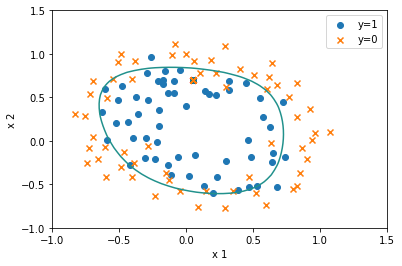

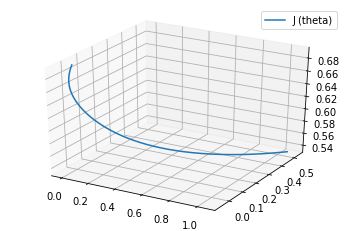

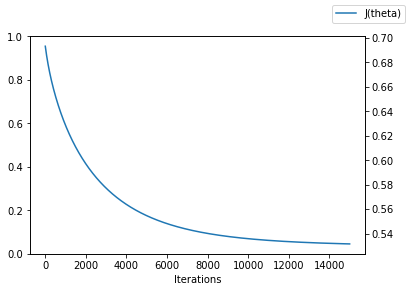

In [ ]:
theta = np.zeros((n, 1))
theta, costs, theta0, theta1 = gradientDescent(X2, y, theta, 0.01, 15000, 1);
drawCircle()
plot_costs_theta(costs, theta0, theta1)
plot_cost_iterations(theta0, theta1, costs)

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


In [ ]:
# bonne chance